<a href="https://colab.research.google.com/github/SAICHANDU15/AI/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement: Estimate the bicarbonates of well water based on its pH value using polynomial regression model. Consider SGD optimizer. Do the manual calculation for one iteration by taking only first two samples in the dataset Write the python code to build polynomial regression model using SGD optimizer Do the data normalization Train the regression model using SGD with training data Compute MSE, RMSE and MAE with training data Compute MSE, RMSE and MAE with testing data https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html**

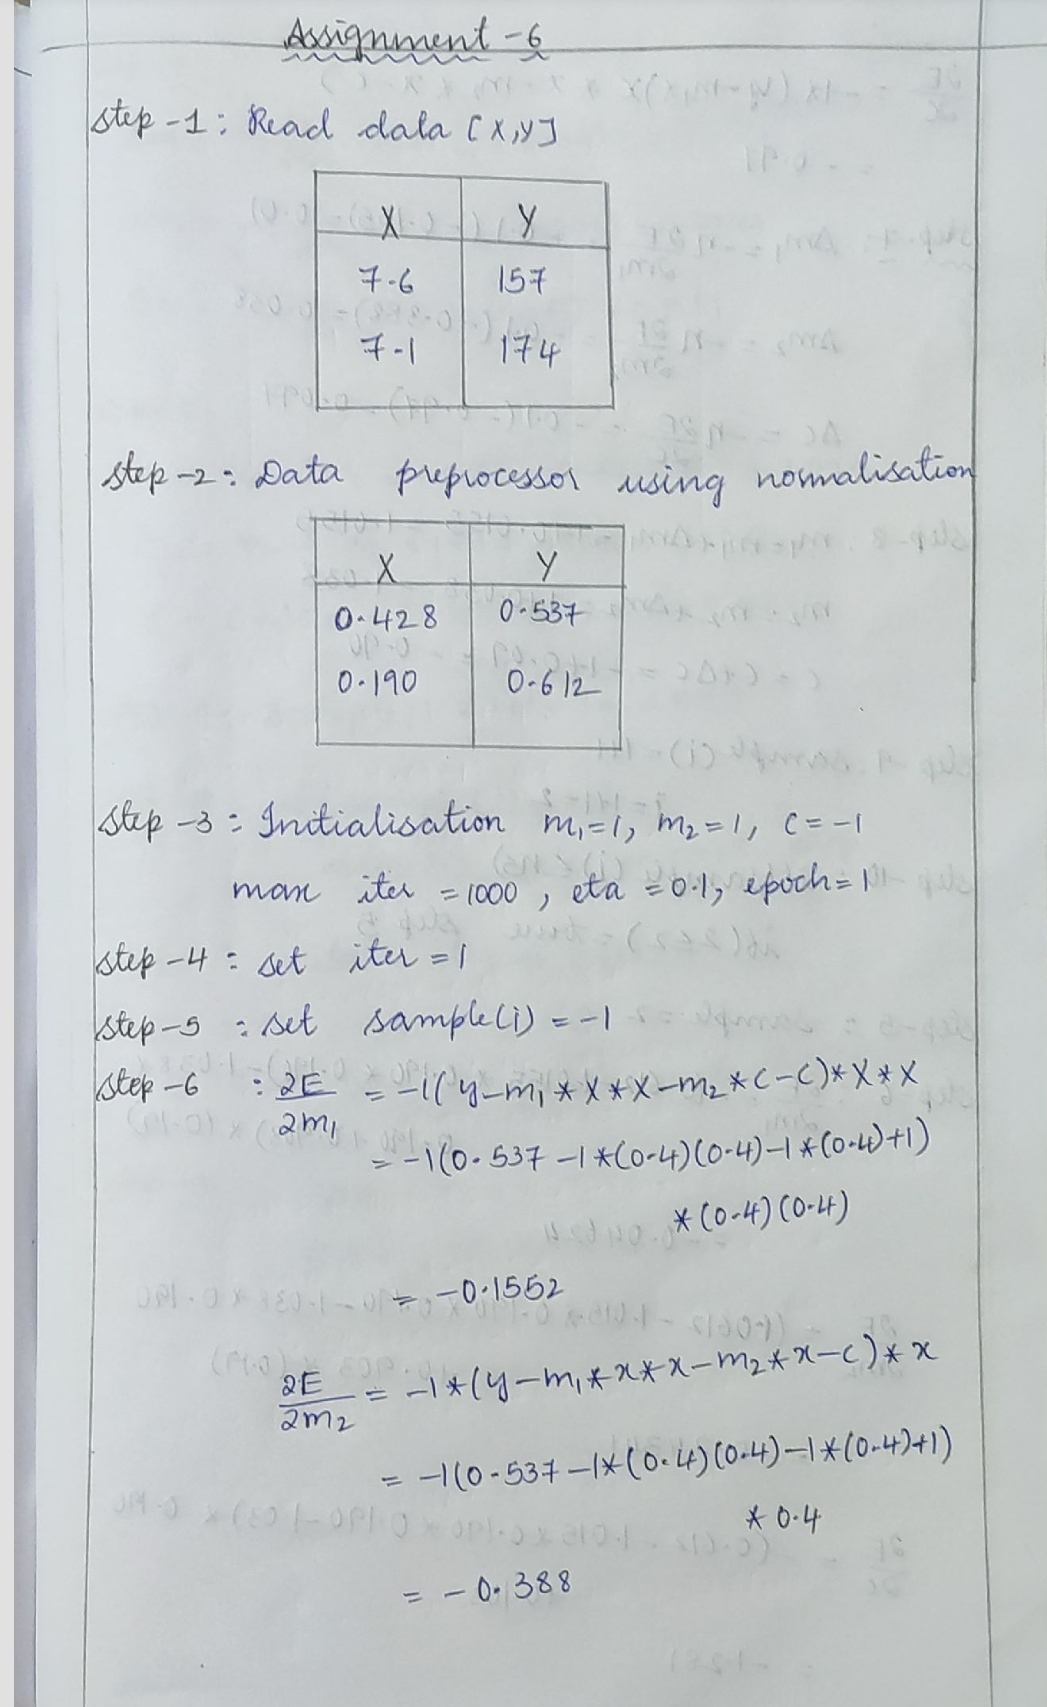

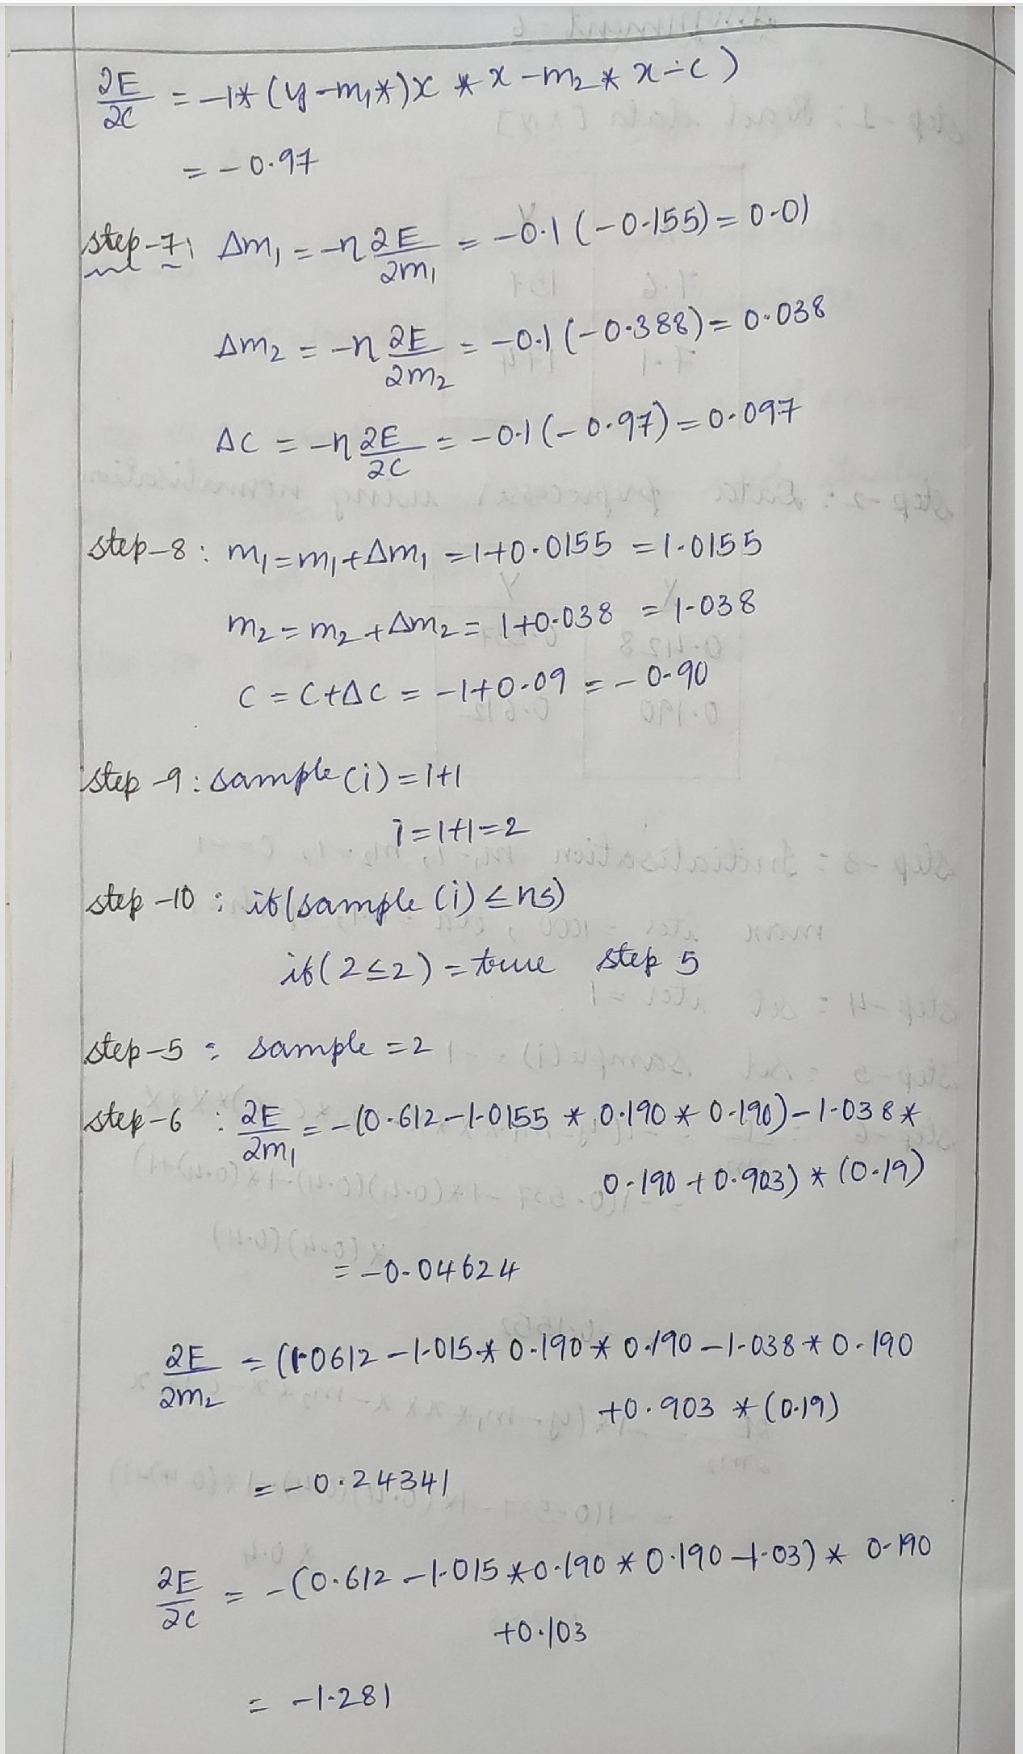

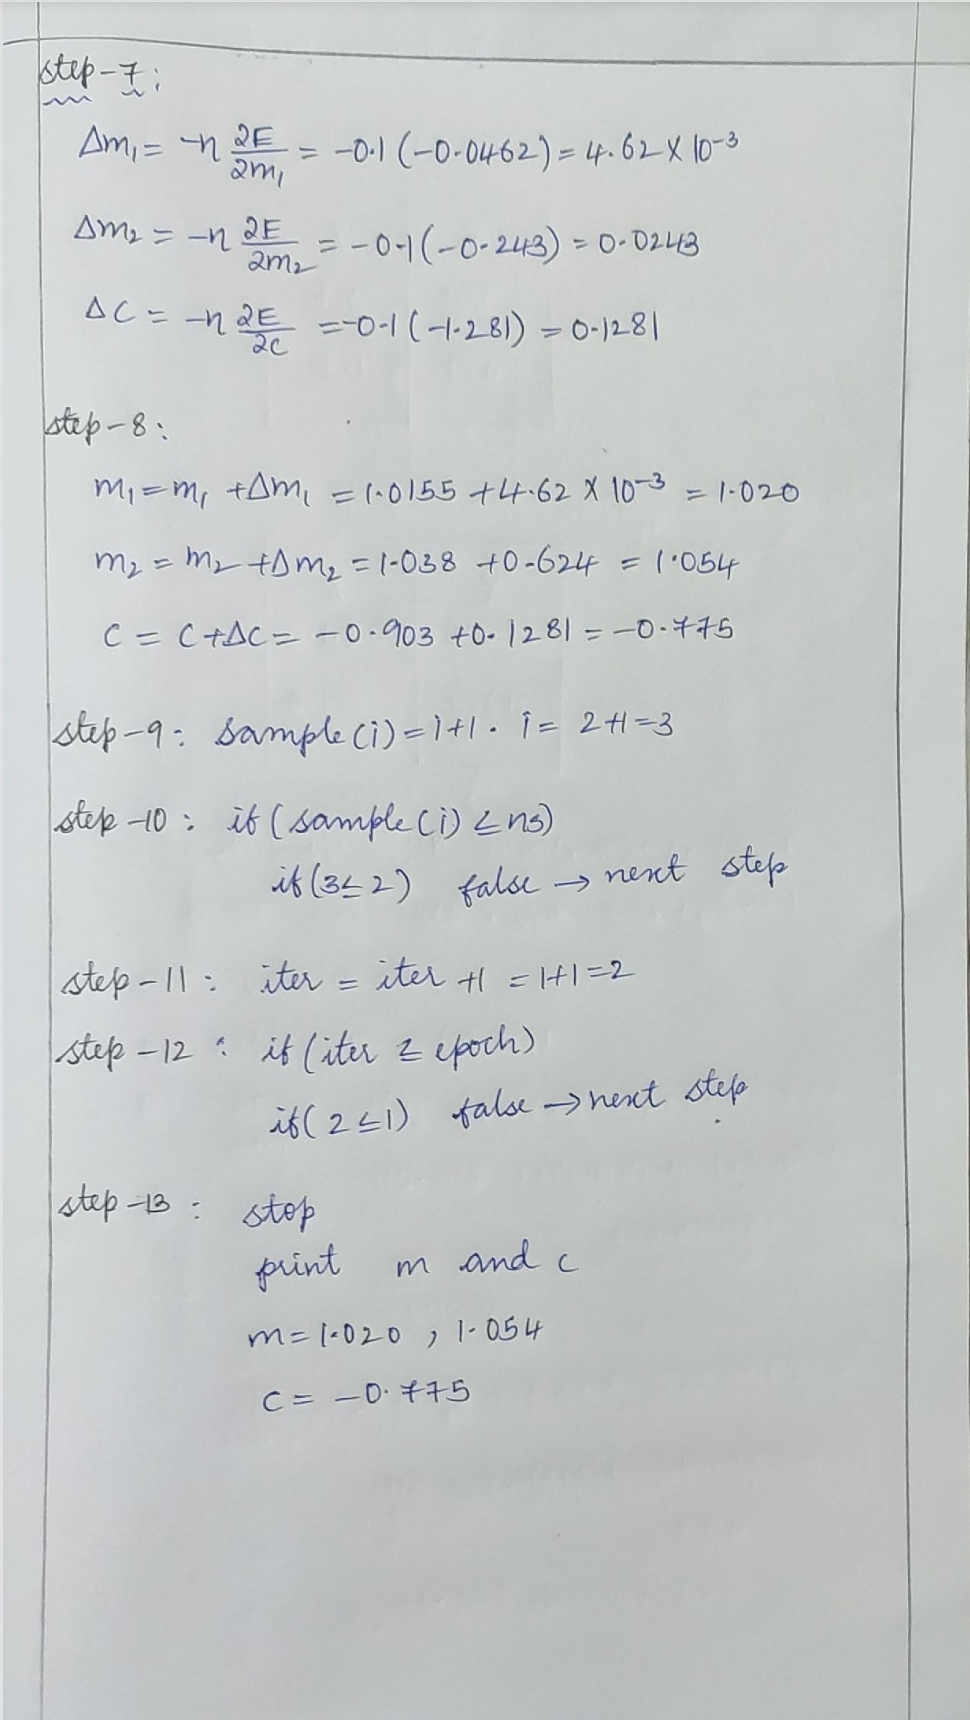

Mount Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import required libraries


In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI-CSV6.csv')
data.head()

,A,B
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [4]:
data['A']

0     7.6
1     7.1
2     8.2
3     7.5
4     7.4
5     7.8
6     7.3
7     8.0
8     7.1
9     7.5
10    8.1
11    7.0
12    7.3
13    7.8
14    7.3
15    8.0
16    8.5
17    7.1
18    8.2
19    7.9
20    7.6
21    8.8
22    7.2
23    7.9
24    8.1
25    7.7
26    8.4
27    7.4
28    7.3
29    8.5
30    7.8
31    6.7
32    7.1
33    7.3
Name: A, dtype: float64

Outliers Detection


In [5]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [6]:
sample_outliers_A = detect_outliers_zscore(data['A'])
sample_outliers_B = detect_outliers_zscore(data['B'])
print("Outliers in A column from Z-scores method: ", sample_outliers_A)
print("Outliers in B column from Z-scores method: ", sample_outliers_B)

Outliers in A column from Z-scores method:  []
Outliers in B column from Z-scores method:  []


Outlier Treatment

In [7]:
from scipy.stats import zscore
zA = np.abs(zscore(data['A']))
zB = np.abs(zscore(data['A']))
data['ZscoreA'] = zA
data['ZscoreB'] = zB
outliers_A=len(data[data['ZscoreA']>3])
outliers_B=len(data[data['ZscoreB']>3])
data_z = data[data['ZscoreA']<3]
data=data_z.drop(['ZscoreA', 'ZscoreB'], axis=1)
data

,A,B
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


Missing Values Treatment

In [8]:
print(data.isnull().sum())

A    0
B    0
dtype: int64


In [9]:
m1=data['A'].mean()
m2=data['B'].mean()
data['A'].fillna(value=m1, inplace=True)
data['B'].fillna(value=m2, inplace=True)
data

,A,B
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


Data Split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.A, data.B, test_size = 0.20, random_state = 10)

Initialization

In [11]:
m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.0001
max_iter=100000

Gradient Calculation

In [12]:
def gradient(m1,m2,c,x,y):
  m1_deriv=-1*(y-m1*x*x-m2*x-c)*x*x
  m2_deriv=-1*(y-m1*x*x-m2*x-c)*x
  c_deriv=-1*(y-m1*x*x-m2*x-c)
  return m1_deriv,m2_deriv,c_deriv

Training Using Stochastic Gradient Descent Optimizer

In [17]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1, m2, c, x_train.iloc[sample], y_train.iloc[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('model parameter m1, m2 and c',m1,m2,c)

model parameter m1, m2 and c -6.5823681741045075 68.25188773319178 6.166072375226864


Model Prediction on Training Data

In [18]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

Model Prediction on Testing Data

In [19]:
y_pred_test = []
for i in x_test:
  y_p_te = (m1 * i*i)+(m2 * i) + c
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

Error Metrics Calculation

In [20]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 48.65076799346695
Mean square error 2366.897226354148
Mean absolute error 42.511580495483216


In [21]:
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse)
mse = mt.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse)  
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Mean square error 3821.686453567985
Root mean square error 61.81979014496883
Mean absolute error 52.752909768519395


In [24]:
x=input("Enter value of input : ")
estimation=m1*float(x)*float(x)+m2*float(x)+c
print("estimated output:",estimation)

Enter value of input : 3.2
estimated output: 157.1686630186104
